In [394]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
from qiskit import execute,transpile
from qiskit import IBMQ
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
import math

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error

In [395]:
IBMQ.save_account('c2779e938fd5f444bb0dcf52b25a6dd4ccca14184dde70ad3d134325659aa685f95f0848fe754475b7044c1ca1dcabd4564b1a3bf38fa0de1f0d31d391f272e8', overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ncsu', group='nc-state', project='grad-qc-class')

ibmqfactory.load_account:WARNING:2022-11-26 15:13:21,238: Credentials are already in use. The existing account in the session will be replaced.


In [396]:
from qiskit import Aer,transpile,assemble
from qiskit.providers.aer.noise import NoiseModel
simulator=Aer.get_backend("qasm_simulator")
backend = provider.get_backend("ibmq_mumbai")
noise_model=NoiseModel.from_backend(backend)

C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (159882.26201706403 > 2 * 78091.63480224457). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (159882.26201706403 > 2 * 78091.63480224457). Truncating to maximum value.
  warn("Device model returned an invalid T_2 relaxation time greater than"
C:\Users\saipr\AppData\Roaming\Python\Python310\site-packages\qiskit_aer\noise\device\models.py:365: UserWarning: Device model returned an invalid T_2 relaxation time greater than the theoretical maximum value 2 * T_1 (159882.26201706403 > 2 * 78091.63480224457). 

In [397]:
def generate_bell_pair(m,corr_bits):
  qc = QuantumCircuit(corr_bits + 1)
  if(m == 1):
        qc.x(0)
  for p in range(1,corr_bits+1):
    qc.cx(0,p)    
  qc.measure_all()
  return qc     

In [398]:
def simulate_and_generate_res(qc,noise_model,shots):
  transpilecircuit=transpile(qc,backend)
  assembled_circuit=assemble(transpilecircuit,shots=shots)
  job=simulator.run(assembled_circuit,noise_model=noise_model)
  results = job.result()
  counts_bit_flip = results.get_counts()
  return counts_bit_flip

In [399]:
def sorted_list(counts_bit_flip,corr_bits):
 sorted_counts_flip = []
 count = 0
 for w in sorted(counts_bit_flip, key=counts_bit_flip.get, reverse=True):
    #print(w, counts_bit_flip[w])
    if(count<=corr_bits):
        sorted_counts_flip.append(w)
        #print(w)
    count = count + 1
 return sorted_counts_flip

In [400]:
def derive_message_bit(sorted_counts):
    found_one = 0
    found_zero = 0
    for i in sorted_counts:
        one = 0
        zero = 0
        for j in i:
            if( j == '0'):
                zero = zero + 1
            else:
                one = one + 1
        if(one >= zero):
            found_one = found_one + 1
        else:
            found_zero = found_zero + 1
    if(found_one > found_zero):
        return 1
    else:
        return 0
            

In [401]:
corr_bits = 4
m = 0
shots = 1024

                             ░ ┌─┐            
   q_0: ──■────■────■────■───░─┤M├────────────
        ┌─┴─┐  │    │    │   ░ └╥┘┌─┐         
   q_1: ┤ X ├──┼────┼────┼───░──╫─┤M├─────────
        └───┘┌─┴─┐  │    │   ░  ║ └╥┘┌─┐      
   q_2: ─────┤ X ├──┼────┼───░──╫──╫─┤M├──────
             └───┘┌─┴─┐  │   ░  ║  ║ └╥┘┌─┐   
   q_3: ──────────┤ X ├──┼───░──╫──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ───────────────┤ X ├─░──╫──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/════════════════════════╩══╩══╩══╩══╩═
                                0  1  2  3  4 


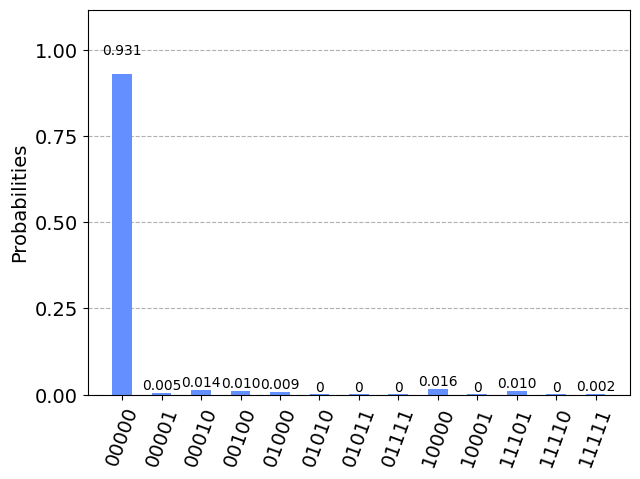

In [402]:
qc = generate_bell_pair(m,corr_bits)
print(qc)
counts_bit_flip = simulate_and_generate_res(qc,noise_model,shots)
plot_histogram(counts_bit_flip)

In [403]:
sorted_counts = sorted_list(counts_bit_flip,corr_bits)
sum = 0
for i in sorted_counts:
    print(counts_bit_flip[i])
    sum = sum + int(counts_bit_flip[i])
print(sum/shots)
message_bit =derive_message_bit(sorted_counts)
print(message_bit)
if(message_bit == m):
    print("Correction passed")
else:
    print("Correct failed")

953
16
14
10
10
0.9794921875
0
Correction passed


In [404]:
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'reset', 'rz', 'sx', 'x']
  Instructions with noise: ['measure', 'x', 'reset', 'cx', 'id', 'sx']
  Qubits with noise: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
  Specific qubit errors: [('id', (0,)), ('id', (1,)), ('id', (2,)), ('id', (3,)), ('id', (4,)), ('id', (5,)), ('id', (6,)), ('id', (7,)), ('id', (8,)), ('id', (9,)), ('id', (10,)), ('id', (11,)), ('id', (12,)), ('id', (13,)), ('id', (14,)), ('id', (15,)), ('id', (16,)), ('id', (17,)), ('id', (18,)), ('id', (19,)), ('id', (20,)), ('id', (21,)), ('id', (22,)), ('id', (23,)), ('id', (24,)), ('id', (25,)), ('id', (26,)), ('sx', (0,)), ('sx', (1,)), ('sx', (2,)), ('sx', (3,)), ('sx', (4,)), ('sx', (5,)), ('sx', (6,)), ('sx', (7,)), ('sx', (8,)), ('sx', (9,)), ('sx', (10,)), ('sx', (11,)), ('sx', (12,)), ('sx', (13,)), ('sx', (14,)), ('sx', (15,)), ('sx', (16,)), ('sx', (17,)), ('sx', (18,)), ('sx', (19,)), ('sx', (20,)), ('sx', (21,)), ('